<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large; color:gray"> Initial analysis - Epigenomics Assignment </div><br> </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import os
import warnings
warnings.filterwarnings('ignore')

### **Path setup**

In [2]:
# RUN THIS NOTEBOOK FROM THE Modelo_11_estados FOLDER!
print(f"Remember working directory: {os.getcwd()}")
input_folder="input/Modelo_11_estados"

Remember working directory: /home/ines/Escritorio/epigCTCF


In [3]:
# !mkdir my_results

### (1) **Analysis of the emission matrix**

From [1], the values correspond to the probability of
observing the mark of the column, conditioned on being in the state of the row.

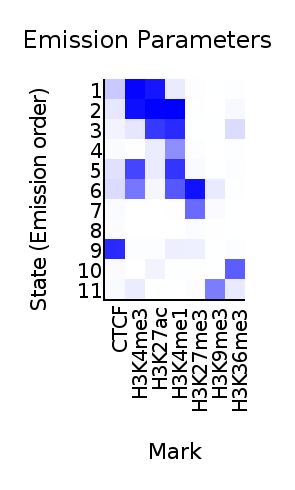

In [3]:
# Emission Matrix
display.Image(f"{input_folder}/emissions_11_Master_11.png")

#### (1.1) **Reference chromatine state for insulators (CTCF)**

***emissions_N.txt*** — This is a tab-delimited text file containing the emission parameters of the HMM. The first row is a header row
indicating each mark used to define the model, and the first column indicates the state. The values correspond to the **probability of
observing the mark of the column**, conditioned on being in the state of the row.

We evaluate the emission matrix and decide which are the representative chromatine states for our epigenetic mark (CTCF).

In [4]:
# Emission matrix file
emission_matrix = pd.read_csv(f"{input_folder}/emissions_11_Master_11.txt", sep="\t", index_col=0, header="infer")
emission_matrix

,CTCF,H3K4me3,H3K27ac,H3K4me1,H3K27me3,H3K9me3,H3K36me3
state (Emission order),,,,,,,
1,0.209389,0.969437,0.902838,0.079627,0.008275,0.002612,0.006032
2,0.091412,0.927374,0.981443,0.984251,0.004861,0.001057,0.025931
3,0.046216,0.095779,0.765510,0.823722,0.002787,0.002188,0.135051
4,0.018222,0.003675,0.073021,0.435898,0.007300,0.000315,0.006162
5,0.116682,0.718903,0.078272,0.785599,0.021810,0.002277,0.008994
6,0.140025,0.528463,0.035380,0.647790,0.919630,0.085764,0.006335
7,0.017177,0.000300,0.000117,0.003130,0.576015,0.019912,0.001637
8,0.010846,0.000454,0.000308,0.000512,0.013342,0.004657,0.001370
9,0.823642,0.010235,0.009349,0.065067,0.063280,0.001342,0.009285


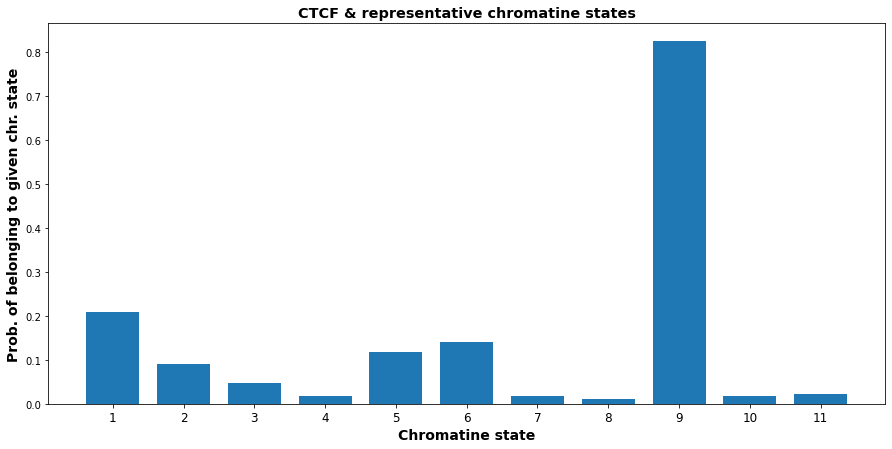

In [5]:
# Plot
fig = plt.figure(figsize=(15,7))
plt.bar(emission_matrix.index, emission_matrix["CTCF"], width=0.75)  # Select CTCF
plt.ylabel("Prob. of belonging to given chr. state", fontsize=14, fontweight='bold')
plt.xlabel("Chromatine state", fontsize=14, fontweight='bold')
plt.xticks(emission_matrix.index, fontsize=12)
plt.title("CTCF & representative chromatine states", size="x-large", fontweight='bold')
plt.show()

**Chromatine state 9** is clearly overrepresented for our CTCF mark, in comparison with the rest of states.

#### (1.2) **Further analysis of chr. state 9**

Thus we specifically evaluated chromatine state 9 for the whole set of epigenetic marks in the emission matrix.


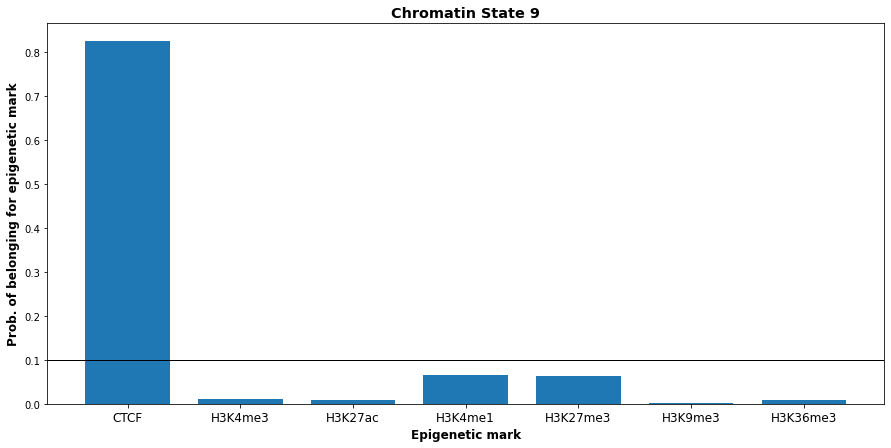

In [6]:
# Plot
fig = plt.figure(figsize=(15,7))
plt.bar(emission_matrix.columns, emission_matrix.loc[9], width=0.75)  # Select chr. state 9
plt.axhline(y=0.1,linewidth=1, color='k')  # Threshold of 0.1
plt.ylabel("Prob. of belonging for epigenetic mark", fontsize=12, fontweight='bold')
plt.xlabel("Epigenetic mark", fontsize=12, fontweight='bold')
plt.xticks(emission_matrix.columns, fontsize=12)
plt.title("Chromatin State 9", size="x-large", fontweight='bold')
plt.show()

Given the last plot, the probability of belonging to E9 of any mark apart from CTCF is lower than 10%.

### (2) **Task 1: Obtain the common segments of interest**

Given the last analysis of states, we decided to focus on **chr. state 9**. Thus the procedure was:

1) **Filtering** both segment (*bed*) files **by chromatin state**, keeping only those segments with feature = "E9".

2) **Obtaining common segments** by means of the *intersect* utility from `bedtools`, with the last filtered *bed* files for both replicates.

#### (2.1) **Filtering of common segments by our chromatine mark of reference**

First, we filter the original segment (*bed*) files from both replicates (Monocyte1, Monocyte2) by state "E9".

In [7]:
# Note folder my_results to store filtered segments bed files
def filter_segments_by_state(filename, states_of_interest, colum_to_filter_by, replicate, output_folder="."):
    
    # Read bed file
    segments = pd.read_csv(f"{filename}", sep="\t", index_col=None, header=None)
    
    # Filtering of common segments according to chromatine states for CTCF
    filtered_segments = segments[segments[colum_to_filter_by].isin(states_of_interest)]
    
    # To CSV
    filtered_segments.to_csv(f"{output_folder}/filtered_segments{replicate}.bed", sep="\t", index=False, header=False)
    
    return filtered_segments

In [8]:
# Filtering of common segments according to chromatine states for CTCF
segments1 = f"{input_folder}/Monocyte1_11_Master_11_segments.bed"
rep1 = 1
segments2 = f"{input_folder}/Monocyte2_11_Master_11_segments.bed"
rep2 = 2

# We have decided to only use chr. state 9
states_of_interest = ["E9"]

# Column 3 in bed file is chr.state (actually 4, but 0-based indexing)
colum_to_filter_by = 3

# My output folder, yours might be different!
output_folder="my_results"

In [9]:
filtered_segments1 = filter_segments_by_state(segments1, states_of_interest, colum_to_filter_by, replicate=rep1, output_folder=output_folder)
print(f"Number of segments for replicate {rep1} in filtered bed file: {filtered_segments1.shape[0]}.")

filtered_segments2 = filter_segments_by_state(segments2, states_of_interest, colum_to_filter_by, replicate=rep2, output_folder=output_folder)
print(f"Number of segments for replicate {rep2} in filtered bed file: {filtered_segments2.shape[0]}.")

print(f"Difference: {filtered_segments2.shape[0] - filtered_segments1.shape[0]}")

Number of segments for replicate 1 in filtered bed file: 22479.
Number of segments for replicate 2 in filtered bed file: 24429.
Difference: 1950


### (3) **Obtain common segments between those previously filtered segments for chr. state 9**

* **TOOL**: bedtools <p>
* **INSTALL**: sudo apt-get install bedtools

**Files of segments** in your output_folder (my_results):
* my_results/filtered_segments1.bed
* my_results/filtered_segments2.bed

**There are several options we could be using for capturing the intersection between previously filtered segments** (see below).

First, remember the **number of lines** (segments) we are working with in each filtered bed file.

In [11]:
!cat my_results/filtered_segments1.bed | wc -l  # as previously checked
!cat my_results/filtered_segments2.bed | wc -l

22479
24429


##### (A) **90% overlap intersectiom** 

These first two options would allow recovering segments where there is a high percentage of coverage on **one of the two original files** in the final segment.

In [12]:
# Monocyte1 as reference for intersection at 90% overlap
# Meaning you require that the feature in 2 overlaps at least 90% of the feature in 1
!bedtools intersect -a my_results/filtered_segments1.bed -b my_results/filtered_segments2.bed -f 0.9 | wc -l  # Number of lines, i.e. number of retrieved segments

12030


Since the segments in replicate 2 are probably shorter, they might be more easily fit in segments in replicate 1: thus the higher number of lines after the first intersect.

In [13]:
# Monocyte2 as reference for intersection at 90% overlap
# Meaning you require that the feature in 1 overlaps at least 90% of the feature in 2
!bedtools intersect -a my_results/filtered_segments2.bed -b my_results/filtered_segments1.bed -f 0.9 | wc -l  # Number of lines, i.e. number of retrieved segments

1674


On the other hand, the segments in replicate 1 are less and probably longer, thus they do not easily fit in segments in replicate 2 (at least, not to the same extent than in the first case) and the number of reported segments is quite lower.

##### (B) **Standard interception**

This utility of simple interception seems to retrieve a higher number of segments, since `bedtools intersect` will report an overlap between A and B so long as there is at least one base pair overlapping.

In [10]:
# Standard interception
!bedtools intersect -a my_results/filtered_segments1.bed -b my_results/filtered_segments2.bed | wc -l  # Number of lines, i.e. number of retrieved segments
!bedtools intersect -a my_results/filtered_segments1.bed -b my_results/filtered_segments2.bed | head

13985
chr10	556400	557400	E9
chr10	1463000	1463600	E9
chr10	2881200	2881600	E9
chr10	2970200	2970800	E9
chr10	3085800	3086200	E9
chr10	3235000	3235800	E9
chr10	3281400	3282200	E9
chr10	4698800	4699600	E9
chr10	4809200	4809600	E9
chr10	4858000	4859000	E9


##### (C) **Reciprocal interception**

In this case, we want to require that a minimal fraction of both the A and the B features is overlapped, thus obtaining intermediate segments with a minimum coverage of both segments in A and B. The number of final segments retrieved is lower, since we would have raised our *quality* threshold (i.e. we want representative segments of both replicates 1 and 2, at least in a 50% coverage).

In [15]:
# Reciprocal interception at 50% overlap
!bedtools intersect -a my_results/filtered_segments1.bed -b my_results/filtered_segments2.bed -f 0.5 -r | wc -l  # Number of lines, i.e. number of retrieved segments

8022


**See toy example right below to decide which option to use!**

#### (3.1) **bedtools examples**

Reference documentation: https://bedtools.readthedocs.io/en/latest/content/tools/intersect.html

An analysis of a toy example might come in handy here. See example files in 'bedtools_examples' folder.

##### (1) See section on **"-f Requiring a minimal overlap fraction"** in reference

In [16]:
!cat bedtools_examples/A.bed
!echo
!cat bedtools_examples/B.bed

chr1	100	200

chr1	130	201
chr1	180	220


In [17]:
# "A" as a reference for intersection at 50% overlap
!bedtools intersect -a bedtools_examples/A.bed -b bedtools_examples/B.bed -f 0.50 

chr1	130	200


##### (2) See section on **"-r, and -f Requiring reciprocal minimal overlap fraction"** in reference

In [18]:
# "A" as a reference for intersection at 50% overlap, but reciprocal
!bedtools intersect -a bedtools_examples/A.bed -b bedtools_examples/B.bed -f 0.50 -r

chr1	130	200


##### (3) **Standard intersection in our toy example**

In [19]:
!bedtools intersect -a bedtools_examples/A.bed -b bedtools_examples/B.bed

chr1	130	200
chr1	180	200


#### **Final remarks after toy example**

* An **interception at 50% overlap** would be interesting if both bed files were more or less comparable in terms of number of segments and length per segment <p>

* In case of not being comparable, a **reciprocal interception** might be a demanding but precise approach (demanding because we might lose some segments not fulfilling our expectations) <p>

* **Standard intersection** is interesting for reporting **all** possible intersection cases, but it might also include **unsignificant intersections**, or even an intersection of several segments from B to the very same segment of A. Is this **potential duplication or repetition** of our interest here? <p>

Thus in our case, I think the best option would be:

* **Reciprocal intersection at 50% overlap** (option C), since that would allow to get intermediate but significant segments from the original replicate bed files. <p>

* Another possibility would be to **annotate both the common segments** from last option and **also the individual segments from each replicate** (previously filtered by chr. state). <p>

* If we really think it is useful to retrieve all potential intersections, even duplicated repetitions from one of the replicates with different segments in the other replicate, the **standard intersection**. *I do not like this option since I think it does introduce some or quite a lot of noise*. <p>

In [20]:
# FINAL INTERSECTION
# Reciprocal interception at 50% overlap
!bedtools intersect -a my_results/filtered_segments1.bed -b my_results/filtered_segments2.bed -f 0.5 -r > my_results/common_segments.bed

In [25]:
# Number of lines, i.e. common segments found
!cat my_results/common_segments.bed | wc -l

8022


#### Related doubts

* Are we interested in the amount of overlap between intersecting features? *Since we can get it back*.

### (4) **External annotations**

In [2]:
# From https://stackoverflow.com/questions/50559000/how-do-i-make-2-images-appear-side-by-side-in-jupyter-notebook-ipython
import IPython.display as display
import ipywidgets as widgets

# Images
img1=open(f'{input_folder}/Monocyte1_11_Master_11_overlap.png','rb').read()
wi1 = widgets.Image(value=img1, format='png', width=600, height=500)
img2=open(f'{input_folder}/Monocyte2_11_Master_11_overlap.png','rb').read()
wi2 = widgets.Image(value=img2, format='png', width=600, height=500)

# Display
images=[wi1,wi2]
widgets=widgets.HBox(images)
display.display(widgets)

NameError: name 'input_folder' is not defined

In the **overlap files**:

* The last row indicates the percentage of the genome that each external annotation covers

* The second column contains the **percentage** of the genome each state covers.

* The remaining rows correspond to different states, and the remaining columns correspond to different external annotations. The values in these rows and columns correspond to the **fold enrichments** for the presence of the external annotation in the state. 

* The **fold enrichments** are computed as the ratio of the fraction of bases assigned to the state that are in the external category to the fraction of bases in the genome that are in the external category.

In [22]:
# Overlap files
overlap1 = pd.read_csv(f"{input_folder}/Monocyte1_11_Master_11_overlap.txt", sep="\t", index_col=0, header="infer")
overlap2 = pd.read_csv(f"{input_folder}/Monocyte2_11_Master_11_overlap.txt", sep="\t", index_col=0, header="infer")

In [23]:
# Final, composed function
def complete_external_annotations(state, rep1df, rep2df):
    
    # Global Figure
    fig = plt.figure(state, figsize=(15,7))
    
    # GENOME COVERAGE
    # Values for y, x-axes
    genome_perc = [rep1df.loc[str(state), "Genome %"], rep2df.loc[str(state), "Genome %"]]  # Note: str(state)
    labels = ["Monocyte1", "Monocyte2"]
    
    # Plot
    ax1 = fig.add_subplot(121)
    ax1.set_ylabel("Genome %", fontsize=10, fontweight='bold')
    ax1.set_xlabel("Replicate", fontsize=10, fontweight='bold')
    ax1.set_title("Genome coverage", size="x-large", fontweight='bold')
    ax1.bar(labels, genome_perc, width=0.6)
    
    # EXTERNAL ANNOTATIONS
    # Replicate dataframes
    rep1df_noG = rep1df.drop(['Genome %'], axis=1)
    rep2df_noG = rep2df.drop(['Genome %'], axis=1)

    # Define Data
    labels = [name.split(".")[0] for name in list(rep1df_noG.columns)]
    rep1 = rep1df_noG.loc[str(state),].to_numpy()  # Note: str(state)
    rep2 = rep2df_noG.loc[str(state),].to_numpy()  # Note: str(state)

    # Multi bar Chart
    ax2 = fig.add_subplot(122)
    x_axis = np.arange(len(labels))
    ax2.bar(x_axis -0.2, rep1, width=0.4, label = 'Monocyte1')
    ax2.bar(x_axis +0.2, rep2, width=0.4, label = 'Monocyte2')

    # Xticks, Labels & Legend
    ax2.set_xticks(x_axis, labels, rotation=55, fontsize=14)
    ax2.set_ylabel("Fold Enrichment", fontsize=10, fontweight='bold')
    ax2.set_xlabel("Annotations", fontsize=10, fontweight='bold')
    ax2.set_title("External Annotation", size="x-large", fontweight='bold')
    ax2.legend()

    # Final Display
    fig.suptitle(f"State: E{state}\n=======", fontsize=16)
    fig.show()

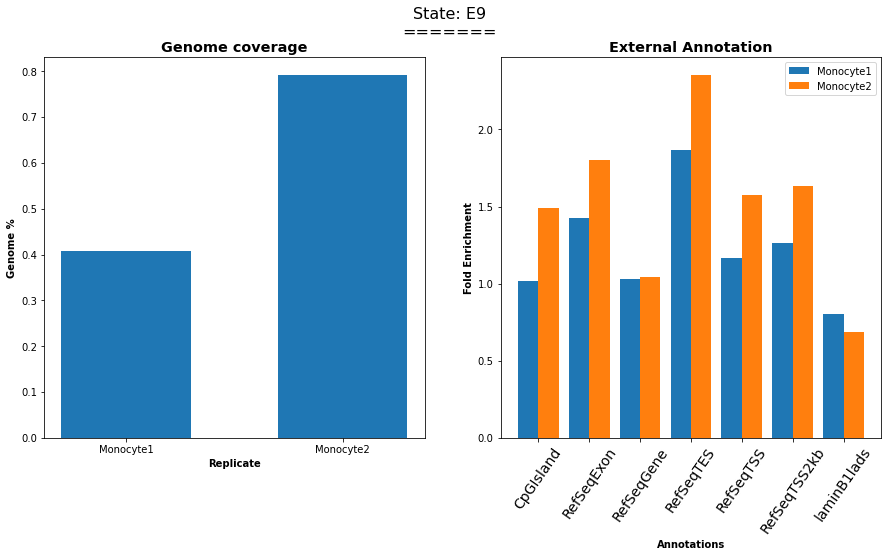

In [24]:
# For each one of our selected states
transformed_states_of_interest = [int(state[1]) for state in states_of_interest]  # From str ("E9") ti int (9)

for state in list(transformed_states_of_interest):
    complete_external_annotations(state, overlap1, overlap2)
    print()

Further analysis (...).

### (x) **Bibliography**

[1] Ernst, J., Kellis, M. *Chromatin-state discovery and genome annotation with ChromHMM*. Nat Protoc 12, 2478–2492 (2017). https://doi.org/10.1038/nprot.2017.124